In [1]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load your DNS dataset
file_path = 'dns-log_test-data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Preprocessing: One-hot encode categorical columns
categorical_columns = ['protocol', 'resolved_address', 'class', 'query_type', 'response', 'rejected']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

# Train One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # Adjust nu and gamma as needed
oc_svm.fit(scaled_features)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['anomaly'] = oc_svm.predict(scaled_features)

# Convert to binary (1 for anomaly, 0 for normal)
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Analyze results
num_anomalies = df['anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Total rows: {len(df)}")
print("\nSample anomalies:")
print(df[df['anomaly'] == 1].head())


Number of anomalies detected: 1903
Total rows: 27935

Sample anomalies:
   protocol             resolved_address       class query_type  response  \
1       udp  _xmpp-client._tcp.gmail.com  C_INTERNET        SRV  NXDOMAIN   
11      udp           www.metasploit.com  C_INTERNET       AAAA  NXDOMAIN   
12      udp           www.metasploit.com  C_INTERNET          A  NXDOMAIN   
14      udp       _xmppconnect.gmail.com  C_INTERNET        TXT  NXDOMAIN   
15      udp                    gmail.com  C_INTERNET          A  NXDOMAIN   

   rejected  anomaly  
1         F        1  
11        F        1  
12        F        1  
14        F        1  
15        F        1  


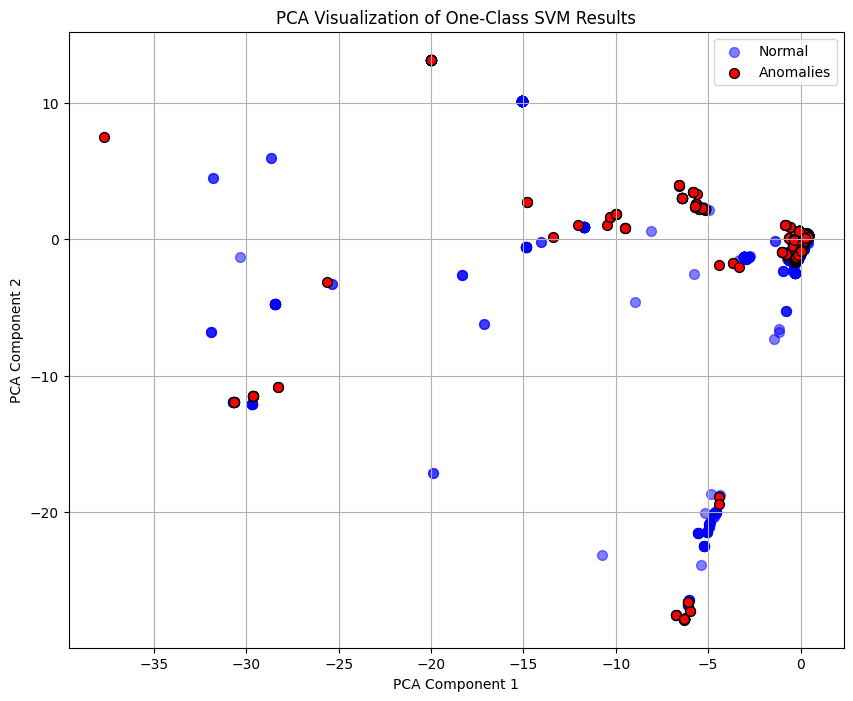

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Separate normal points and anomalies
normal_points = df[df['anomaly'] == 0]
anomalies = df[df['anomaly'] == 1]

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(normal_points['pca_1'], normal_points['pca_2'], 
            c='blue', label='Normal', s=50, alpha=0.5)
plt.scatter(anomalies['pca_1'], anomalies['pca_2'], 
            c='red', label='Anomalies', s=50, edgecolor='k')

# Add plot details
plt.title('PCA Visualization of One-Class SVM Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


c:\Users\Dave Sisk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


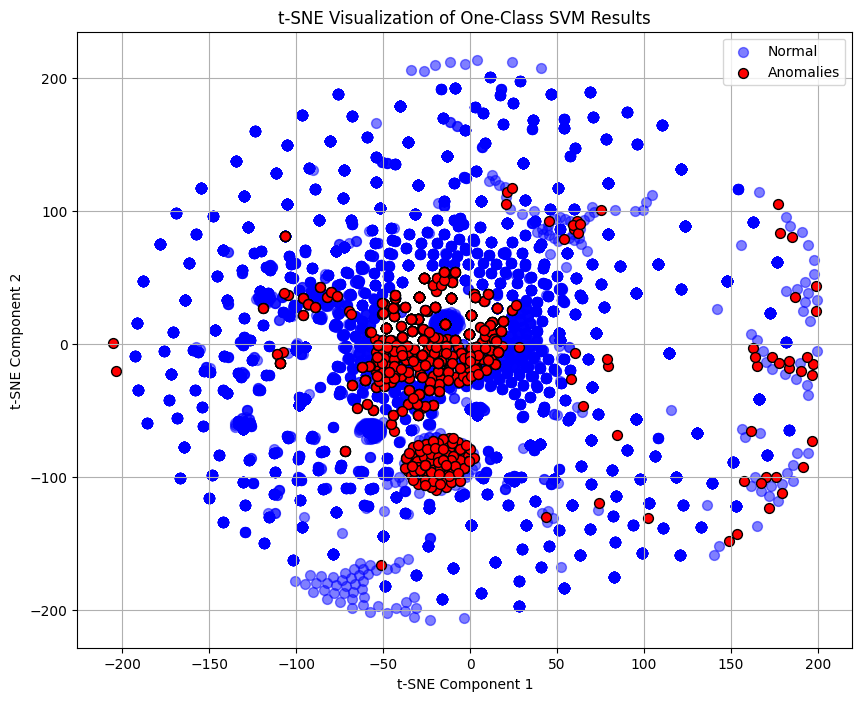

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Add t-SNE results to the DataFrame
df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

# Separate normal points and anomalies
normal_points = df[df['anomaly'] == 0]
anomalies = df[df['anomaly'] == 1]

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(normal_points['tsne_1'], normal_points['tsne_2'], 
            c='blue', label='Normal', s=50, alpha=0.5)
plt.scatter(anomalies['tsne_1'], anomalies['tsne_2'], 
            c='red', label='Anomalies', s=50, edgecolor='k')

# Add plot details
plt.title('t-SNE Visualization of One-Class SVM Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid()
plt.show()
